In [412]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
    
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import lfilter

import central_complex
import cx_basic
import cx_rate
import trials
import analysis
import plotter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


generate a route

In [413]:
route_file = 'route.npz'
T_outbound = 1500
T_inbound = 1500

cx = cx_rate.CXRatePontin(noise=0.1)

#h, v, _ = trials.load_route(filename=route_file)
h, v = trials.generate_route(T=T_outbound)
h, v, log, cpu4_snapshot = trials.run_trial(logging=True,
                                            T_outbound=T_outbound,
                                            T_inbound=T_inbound,
                                            noise=0.1,
                                            cx=cx,
                                            route=(h[:T_outbound], v[:T_outbound]))

Find timestep with biggest motor value soon after turning point

1502

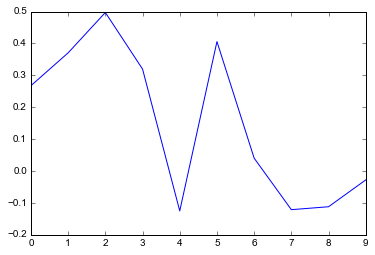

In [ ]:
plt.plot(log.motor[1500:1510].T)
idx = 1500 + np.argmax(log.motor[1500:1510])
idx

create crude bar charts from snapshot of cell values

In [ ]:
fig, ax = plt.subplots(4,2, figsize =(12,12))

ax[0][0].bar(np.arange(1, 9), log.tb1[:,idx], color='green')

ax[1][0].bar(np.arange(1, 9), log.cpu4[:8,idx], color='orange')
ax[1][1].bar(np.arange(9, 17), log.cpu4[8:,idx], color='yellow')

ax[2][0].bar(np.arange(1, 9), log.cpu1[:8,idx], color='cyan')
ax[2][1].bar(np.arange(9, 17), log.cpu1[8:,idx], color='blue')

barlist=ax[3][0].bar([1,2], [np.sum(log.cpu1[:8,idx]), np.sum(log.cpu1[8:,idx])])
barlist[0].set_color('cyan')

Print values

In [ ]:
print log.tb1[:,idx]
print log.cpu4[:8,idx]
print log.cpu4[8:,idx]
print log.cpu1[:8,idx]
print log.cpu1[8:,idx]